In [1]:
import os

In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
dataset = r"D:\cats_and_dogs_filtered"

In [4]:
train_ds = os.path.join(dataset,'train')
valid_ds = os.path.join(dataset,'validation')

In [5]:
BATCH_SIZE = 100
IMG_SHAPE  = 150 

# ReScaling the image

In [6]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten() # converts to 1d array
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout() #automatically adjusts subplot params so that the subplot(s) fits in to the figure area
    plt.show()

In [7]:
image_gen = ImageDataGenerator(rescale = 1./255)

In [8]:
train_gen = image_gen.flow_from_directory(batch_size = BATCH_SIZE, 
                                         directory = train_ds,
                                         shuffle = True,
                                         target_size = (IMG_SHAPE,IMG_SHAPE),
                                         class_mode = 'binary')

Found 2000 images belonging to 2 classes.


In [9]:
val_gen = image_gen.flow_from_directory(batch_size = BATCH_SIZE,
                                       directory = valid_ds,
                                       shuffle =True,
                                       target_size = (IMG_SHAPE, IMG_SHAPE),
                                       class_mode = 'binary')

Found 1000 images belonging to 2 classes.


In [10]:
# sheare_range
# height_shift_range
# width_shift_range
# rotation_range
# zoom_range
# fill_mode
# brightness_range

In [11]:
#class mode in imageDataGenerator will yield image of class 
#1. categorical 2D one-hot encoded
#2. binary 1d binary
#3. sparse id int
#4. input similar to input
#5. none - similar to predict()

In [12]:
training_images, _ = next(train_gen)

train_img = []
for i in range(5):
    train_img.append(training_images[i])


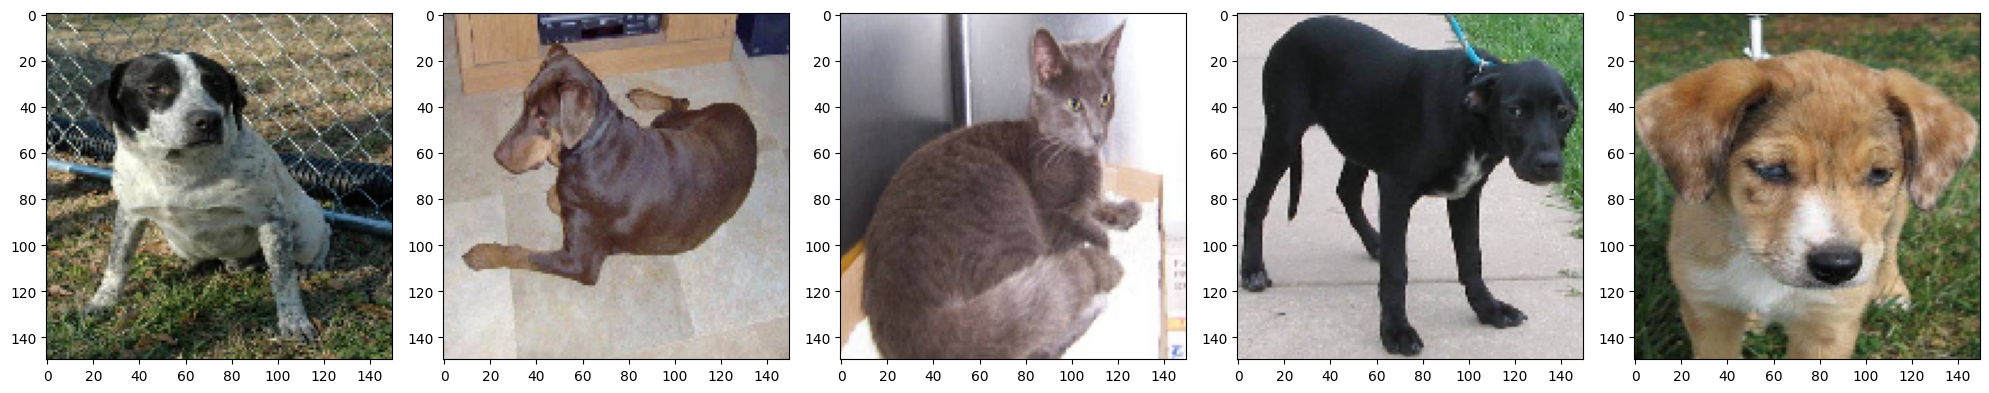

In [13]:
plotImages(train_img)

In [14]:
# image_gen = ImageDataGenerator(rescale = 1./255,
#                                   width_shift_range = 0.2,
#                                   height_shift_range = 0.2,
#                                   rotation_range = 40,
#                                   shear_range = 0.2,
#                                   zoom_range = 0.2,
#                                   horizontal_flip = True,
#                                   fill_mode = 'nearest'
#                                   )

# train_gen = image_gen.flow_from_directory(batch_size = BATCH_SIZE,
#                                           directory = train_ds,
#                                           shuffle = True,
#                                           target_size = (IMG_SHAPE,IMG_SHAPE),
#                                           class_mode = 'binary'
#                                          )

In [15]:
# image_val = ImageDataGenerator(rescale = 1./255)

# val_gen = image_val.flow_from_directory(batch_size = BATCH_SIZE,
#                                        directory = valid_ds,
#                                        shuffle =True,
#                                        target_size = (IMG_SHAPE, IMG_SHAPE),
#                                        class_mode = 'binary')

In [16]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(2)
])

In [17]:
model.compile(optimizer = 'adam',
             loss = tf.keras.losses.BinaryCrossentropy(from_logits=False),
             metrics=['accuracy'])

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 74, 74, 32)        0         
                                                                 
 flatten (Flatten)           (None, 175232)            0         
                                                                 
 dense (Dense)               (None, 512)               89719296  
                                                                 
 dense_1 (Dense)             (None, 2)                 1026      
                                                        

In [19]:
total_train = len(train_ds)
total_val = len(valid_ds)

In [ ]:
epochs = 50

history = model.fit(
    train_gen,
    steps_per_epoch = int(np.ceil(total_train/float(BATCH_SIZE))),
    epochs=epochs,
    validation_data = val_gen,
    validation_steps = int(np.ceil(total_val/float(BATCH_SIZE))),
)

Epoch 1/50


In [ ]:
# import cv2
# image = cv2.imread("D:\cat.jpg").resize(150,150)
# model.predict(image)

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']

In [ ]:
plt.figure(figsize = (10,4))
plt.subplot(1,2,1) #row, column, 1st or 2nd 
plt.plot(range(epochs), acc)
plt.plot(range(epochs), val_acc)
plt.subplot(1,2,2) #row, column, 1st or 2nd 
plt.plot(range(epochs), loss)
plt.plot(range(epochs), val_loss)
plt.show()